In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df.shape

(418, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

__Categorical Columns__
- Survived
- Pclass
- Sex
- SibSp
- Parch
- Embarked

__Numerical Columns__
- PassengerId
- Age
- Fare

__Mixed Columns__
- Name
- Ticket
- Cabin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Missing values in cabin, age, fare columns.
# We need to drop cabin column as 78% values are missing.
# We need to change the data type of few columns.

In [9]:
# Dropping cabin column
df.drop(columns=["Cabin"], inplace=True)

In [10]:
# Inputting missing values for age using mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [12]:
# Inputting missing value for fare using mean.
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [13]:
df["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [14]:
df["Parch"].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

__Columns where Data Type needs to be Changed__
- Survived(category)
- Pclass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [15]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["Age"] = df["Age"].astype("int")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int64   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 25.1+ KB


In [17]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.191388,0.447368,0.392344,35.627188
std,120.810458,12.654104,0.896760,0.981429,55.840500
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


Total Passengers: 418
Death Percent: 63.63636363636363


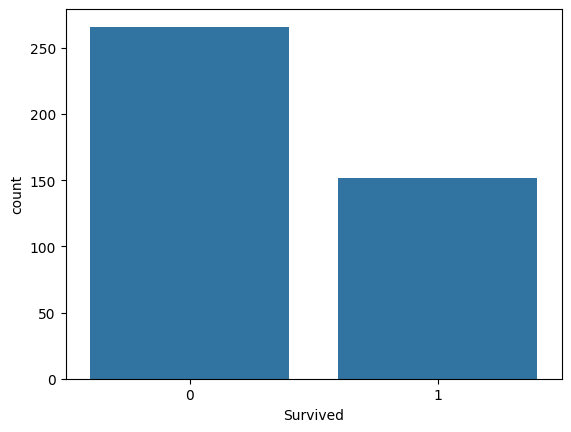

In [39]:
# Univariate Analysis
# Survived
sns.countplot(x="Survived", data=df)
death_percent = df["Survived"].value_counts().values[0] / 418 * 100
print("Total Passengers:", 418)
print("Death Percent:", death_percent)

Pclass
3    52.153110
1    25.598086
2    22.248804
Name: count, dtype: float64


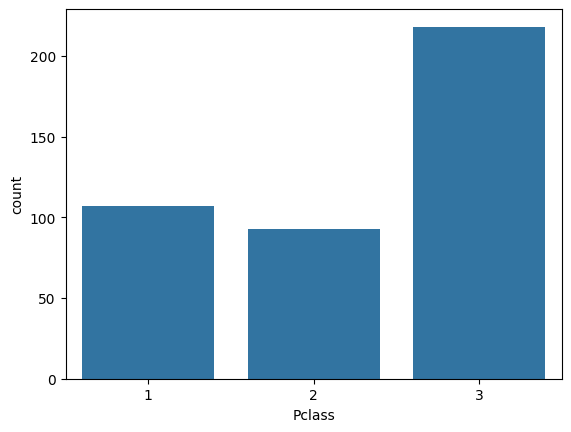

In [40]:
# Pclass
sns.countplot(x="Pclass", data=df)
print((df["Pclass"].value_counts() / 418) * 100)

In [41]:
# Pclass 3 had max passengers

Sex
male      63.636364
female    36.363636
Name: count, dtype: float64


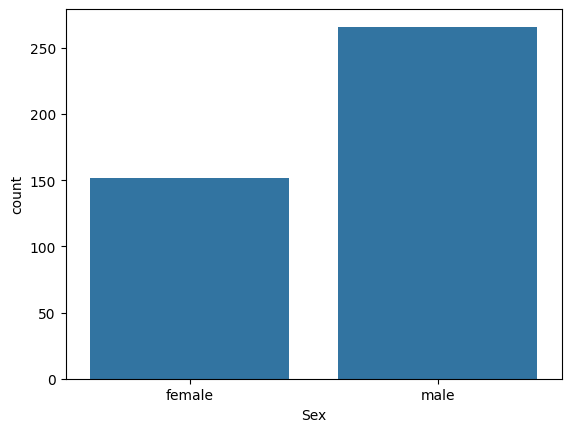

In [43]:
# Sex
sns.countplot(x="Sex", data=df)
print(df["Sex"].value_counts() / 418 * 100)

SibSp
0    67.703349
1    26.315789
2     3.349282
3     0.956938
4     0.956938
8     0.478469
5     0.239234
Name: count, dtype: float64


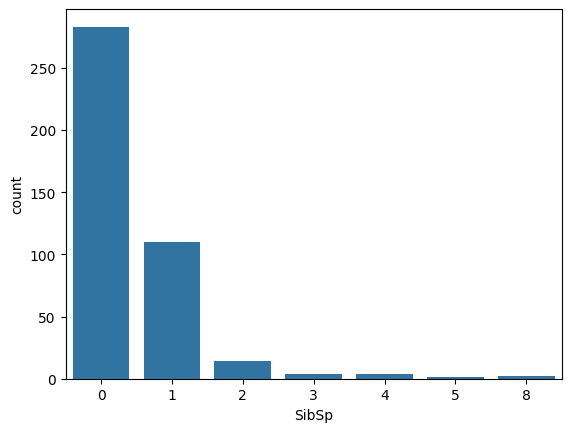

In [44]:
# SibSp
sns.countplot(x="SibSp", data=df)
print(df["SibSp"].value_counts() / 418 * 100)

Parch
0    77.511962
1    12.440191
2     7.894737
3     0.717703
4     0.478469
9     0.478469
6     0.239234
5     0.239234
Name: count, dtype: float64


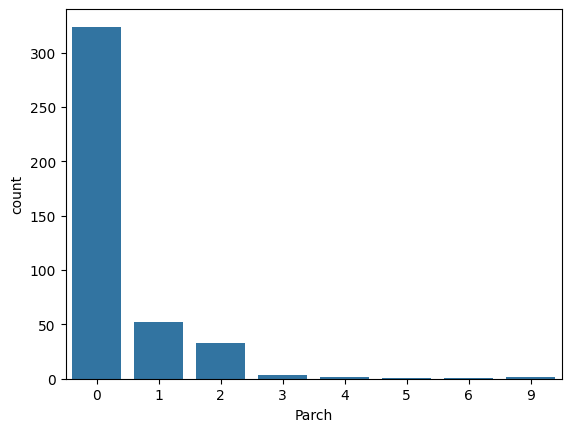

In [45]:
# Parch
sns.countplot(x="Parch", data=df)
print(df["Parch"].value_counts() / 418 * 100)

Embarked
S    64.593301
C    24.401914
Q    11.004785
Name: count, dtype: float64


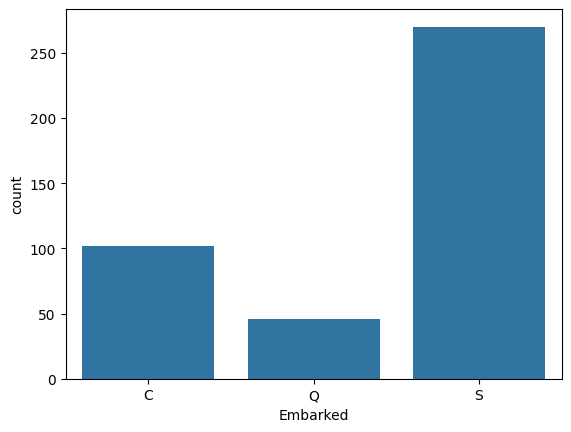

In [47]:
# Embarked
sns.countplot(x="Embarked", data=df)
print(df["Embarked"].value_counts() / 418 * 100)

0.516080054627597
0.9003780571212805


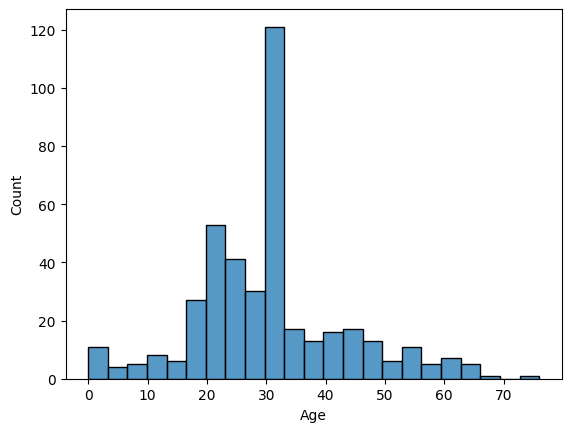

In [52]:
# Age
sns.histplot(df["Age"])
print(df["Age"].skew())
print(df["Age"].kurt())

<Axes: ylabel='Age'>

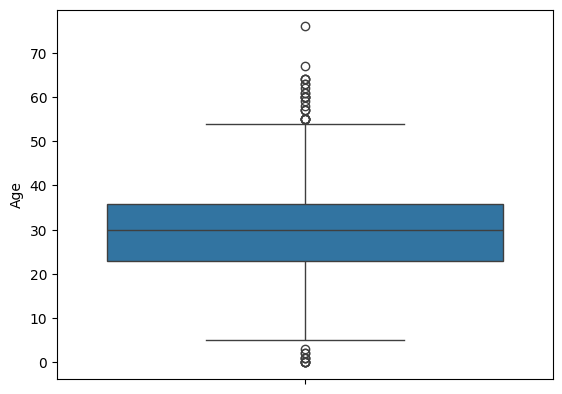

In [53]:
sns.boxplot(df["Age"])

In [65]:
# Analysing Outliers
print("Age 60 - 70:", df[(df["Age"] >= 60) & (df["Age"] < 70)].shape[0])
print("Age 70 - 75:", df[(df["Age"] >= 70) & (df["Age"] < 75)].shape[0])
print("Age 75 - 80:", df[(df["Age"] >= 75) & (df["Age"] < 80)].shape[0])
print("Age 0 - 1:", df[(df["Age"] >= 0) & (df["Age"] < 1)].shape[0])

Age 60 - 70: 13
Age 70 - 75: 0
Age 75 - 80: 1
Age 0 - 1: 5


__Conclusion__
- Age can be considered as normal Distribution
- Age 75 - 80 can be treated as outliers based on deep analysis

3.6915998329393105
17.971266196944526


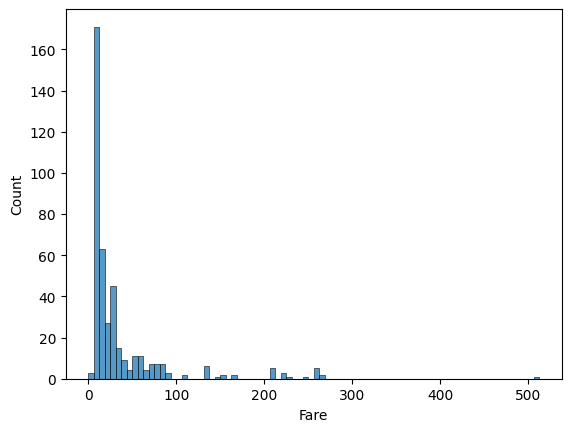

In [66]:
# Fare
sns.histplot(df["Fare"])
print(df["Fare"].skew())
print(df["Fare"].kurt())

<Axes: ylabel='Fare'>

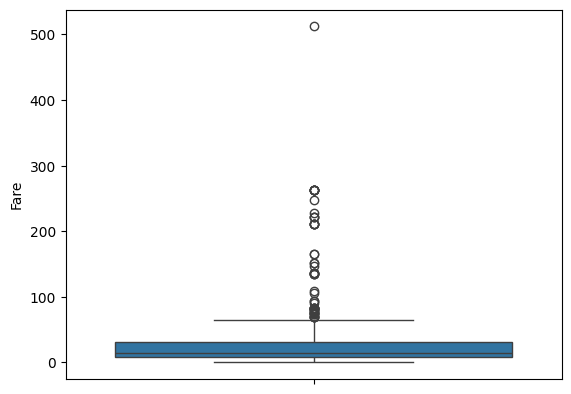

In [67]:
sns.boxplot(df["Fare"])

In [69]:
# Analysing Outliers
print("Age 200 - 300:", df[(df["Fare"] >= 200) & (df["Fare"] < 300)].shape[0])
print("Age 300 - 550:", df[(df["Fare"] >= 300) & (df["Fare"] < 550)].shape[0])

Age 200 - 300: 17
Age 300 - 550: 1


__Conclusion__
- Maximum people preferred cheaper tickets
- Age 300 - 550 can be treated as outlier

Survived,0,1
Pclass,,
1,53.271028,46.728972
2,67.741935,32.258065
3,66.972477,33.027523


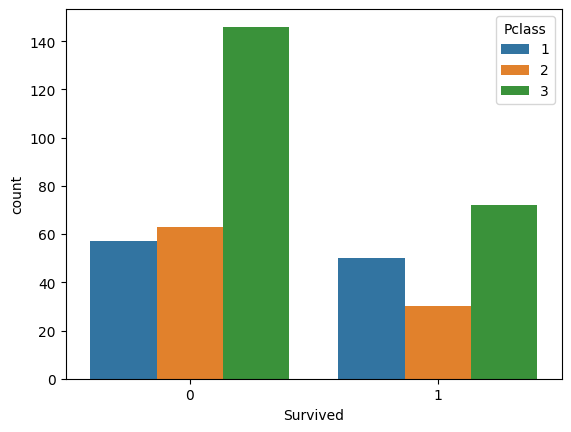

In [83]:
# Multivariate Analysis
# Survived vs Pclass
sns.countplot(x="Survived", hue="Pclass", data=df)
pd.crosstab(df["Pclass"], df["Survived"], normalize="index") * 100

Survived,0,1
Sex,,
female,0.0,100.0
male,100.0,0.0


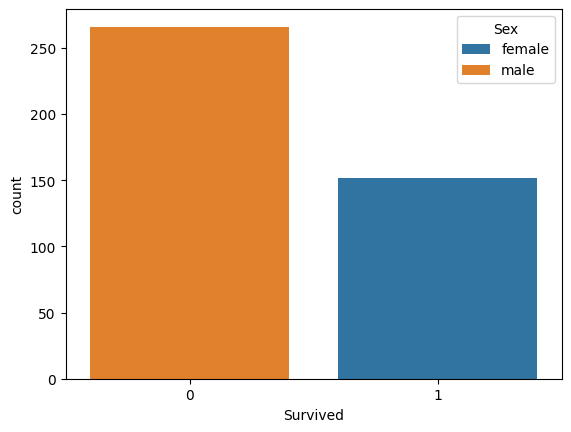

In [82]:
# Survived vs Sex
sns.countplot(x="Survived", hue="Sex", data=df)
pd.crosstab(df["Sex"], df["Survived"], normalize="index") * 100

Survived,0,1
Embarked,,
C,60.784314,39.215686
Q,47.826087,52.173913
S,67.407407,32.592593


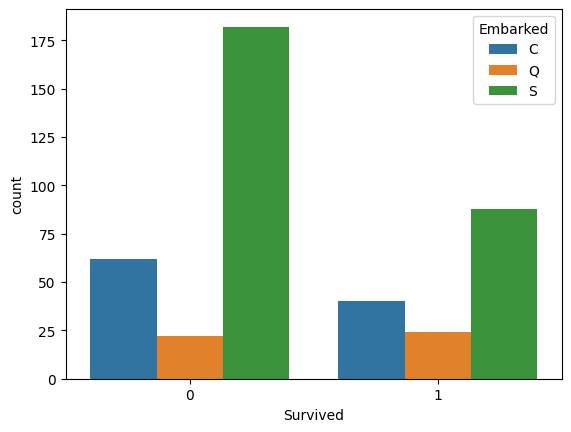

In [84]:
# Survived vs Embarked
sns.countplot(x="Survived", hue="Embarked", data=df)
pd.crosstab(df["Embarked"], df["Survived"], normalize="index") * 100

C:\Users\beher\AppData\Local\Temp\ipykernel_16984\728053772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 0]["Age"])
C:\Users\beher\AppData\Local\Temp\ipykernel_16984\728053772.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 1]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

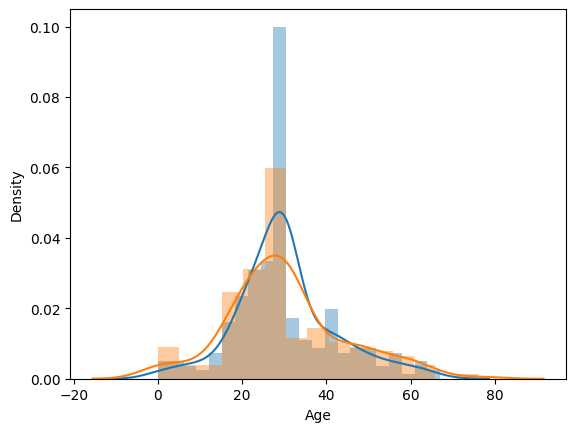

In [89]:
# Survived vs Age
sns.distplot(df[df["Survived"] == 0]["Age"])
sns.distplot(df[df["Survived"] == 1]["Age"])

C:\Users\beher\AppData\Local\Temp\ipykernel_16984\1949277031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 0]["Fare"])
C:\Users\beher\AppData\Local\Temp\ipykernel_16984\1949277031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"] == 1]["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

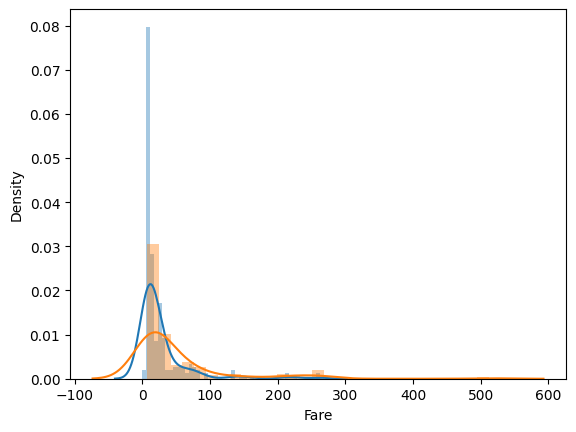

In [90]:
# Survived vs Fare
sns.distplot(df[df["Survived"] == 0]["Fare"])
sns.distplot(df[df["Survived"] == 1]["Fare"])

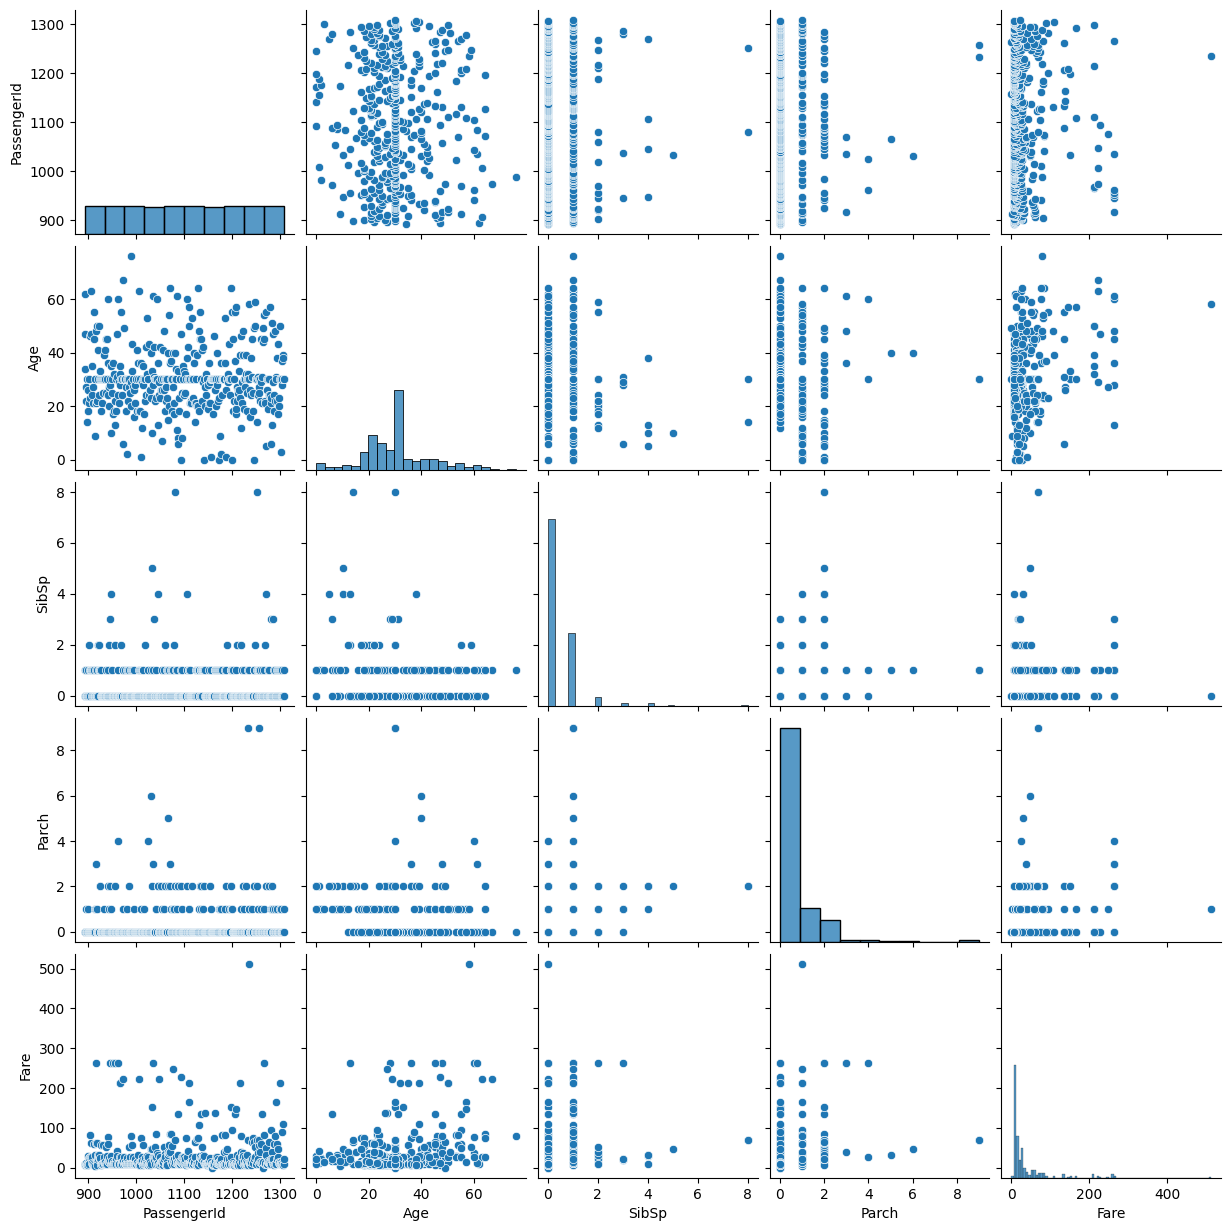

In [92]:
sns.pairplot(df)

<Axes: >

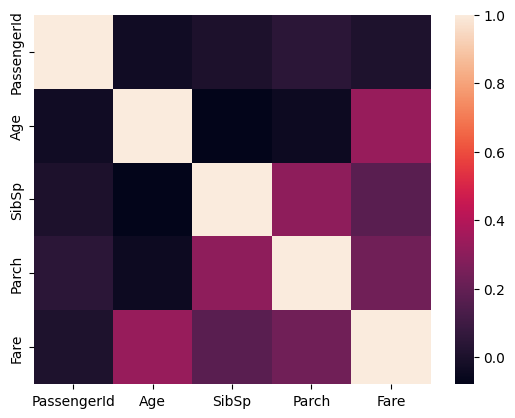

In [97]:
sns.heatmap(df.corr(numeric_only=True))